## Main Question  
Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed!  
The investment would only make sense, if they can get more than 1 million monthly users with in next 18 months.  
In order to help Unicorn Ventures in their decision, **we need to forecast the traffic on JetRail for the next 7 months**.  
We are provided with traffic data of JetRail since inception in the test file. 

### Data Understanding  
#### Hypothesis Generation
Hypothesis generation is done before having a look at the data in order to avoid any bias that may result after the observation. 

Hypothesis generation helps us to point out the factors which might affect our dependent variable.  

Below are some of the hypotheses which I think can affect the passenger count (dependent variable for this time series problem) on the JetRail:  

1. There will be an increase in the traffic as the years pass by.  
**Explanation** - Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally companies expand their businesses over time leading to more customers travelling through JetRail. 
2. The traffic will be high from May to October.  
**Explanation** - Tourist visits generally increases during this time period.  
3. Traffic on weekdays will be more as compared to weekends/holidays.  
**Explanation** - People will go to office on weekdays and hence the traffic will be more.  
4. Traffic during the peak hours will be high.   
**Explanation** - People will travel to work, college.

Let's now validate each of these hypotheses based on the dataset.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_set = pd.read_csv("Datasets/Train_JetRail.csv")
test_set = pd.read_csv("Datasets/Test_JetRail.csv")

In [5]:
# Making copy of each set, just-in-case
train_set_original = train_set.copy()
test_set_original = test_set.copy()

In [6]:
train_set.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


1. **ID** is the unique number given to each observation point. 
2. **Datetime** is the time of each observation. 
3. **Count** is the passenger count corresponding to each Datetime.

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [7]:
test_set.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


**We have to predict the 'Count' for the test file.**

In [9]:
print("Train Set Shape: ", train_set.shape)
print("Test Set Shape: ", test_set.shape)

Train Set Shape:  (18288, 3)
Test Set Shape:  (5112, 2)


#### Feature Extraction

In [10]:
# Converting object format of 'Datetime' to datetime format.
train_set['Datetime'] = pd.to_datetime(train_set['Datetime'], format='%d-%m-%Y %H:%M')
test_set['Datetime'] = pd.to_datetime(test_set['Datetime'], format='%d-%m-%Y %H:%M')

We made some hypothesis for the effect of hour, day, month, and year on the passenger count.  
So, let’s extract the year, month, day, and hour from the Datetime to validate our hypothesis.

In [14]:
for date in (train_set, test_set):
    date['year'] = date.Datetime.dt.year
    date['month'] = date.Datetime.dt.month
    date['day'] = date.Datetime.dt.day
    date['hour'] = date.Datetime.dt.hour

3. Traffic on weekdays will be more as compared to weekends/holidays.  
**Explanation** - People will go to office on weekdays and hence the traffic will be more. 

We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.  
Values of 5 and 6 represents that the days are weekend. 

In [16]:
train_set['day of week'] = train_set['Datetime'].dt.dayofweek

In [17]:
train_set.head()

,ID,Datetime,Count,year,month,day,hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [ ]:
# Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend. 
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [19]:
tempDatetime = train_set['Datetime']

In [22]:
temp = train_set['Datetime'].apply(applyer)
train_set['weekend'] = temp

In [24]:
# Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend. 
train_set.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [25]:
# Visualizing the time series now

train_set.index = train_set['Datetime'] # Indexing the Datetime to get the time period on the X-AXIS.

In [26]:
train_set.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [33]:
timeseris = train_set['Count']

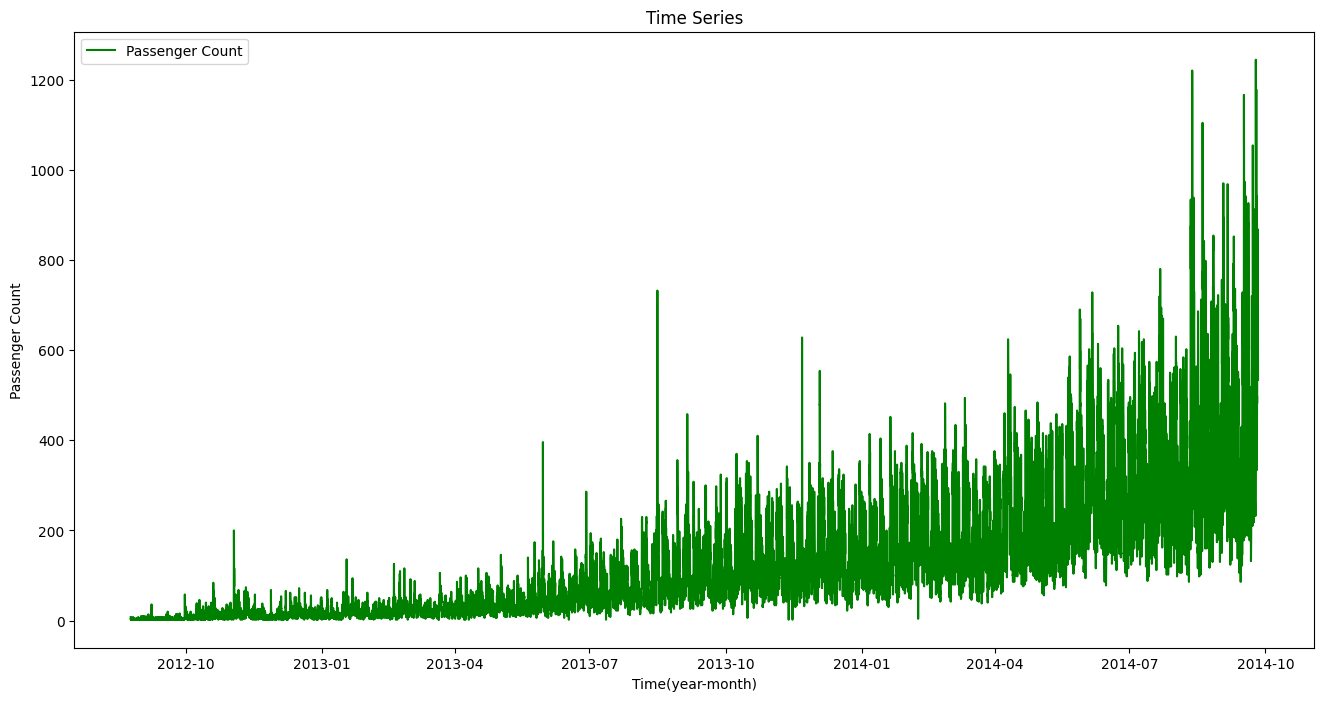

In [37]:
plt.figure(figsize=(16, 8))
plt.plot(timeseris, label='Passenger Count', color="green")
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc="best")

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time.  
We can also see that at certain points there is a sudden increase in the number of counts.  
The plausible reason behind this could be that on particular day, due to some event the traffic was high. 

**Hyothesis 1:** Traffic will increase as the years pass by! 

In [39]:
grouped_by_year = train_set.groupby('year')['Count'].mean()

Text(0.5, 1.0, 'Average Number Of Passengers Per Year')

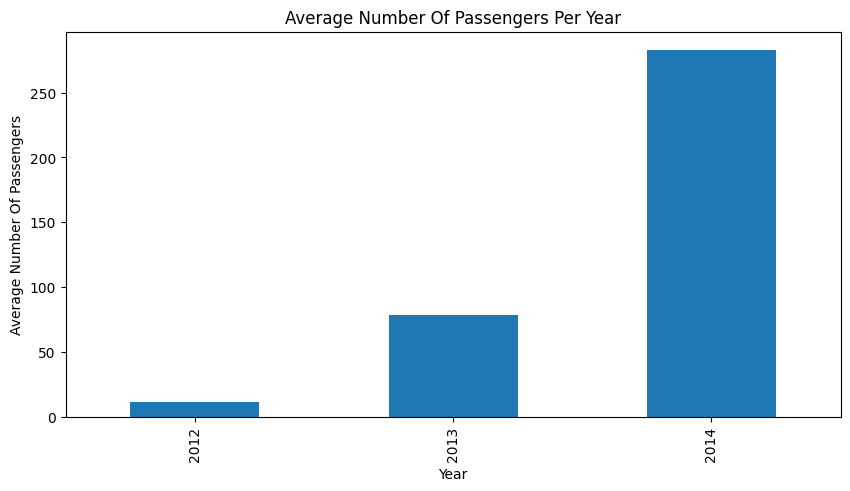

In [43]:
plt.figure(figsize=(10, 5))
grouped_by_year.plot(kind="bar")
plt.xlabel('Year')
plt.ylabel('Average Number Of Passengers')
plt.title('Average Number Of Passengers Per Year')

We see an exponential growth in the traffic with respect to year which validates our hypothesis!